In [1]:
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_combined = pd.read_csv("../CombinedBooksRandomized.csv")
df_combined.head()

,Title,Author,Author Average Rating,Author Votes,Review Count,Distinct Works,Year,Rating,Raters,Genres
0,The Left Hand of Darkness (Paperback),Ursula K. Le Guin,4.07,1258005,85585,753,1969,4.09,155037,"Science Fiction,Fiction,Fantasy,Classics,Scien..."
1,Wish You Were Here (Hardcover),Jodi Picoult,3.99,4447186,273761,82,2021,3.99,153115,"Fiction,Contemporary,Audiobook,Romance,Adult,A..."
2,If I Had Your Face (Hardcover),Frances Cha,3.76,41079,5356,4,2020,3.76,41078,"Fiction,Contemporary,Literary Fiction,Adult,Fe..."
3,I'll Be Gone in the Dark: One Woman's Obsessiv...,Michelle McNamara,4.12,210117,18190,2,2018,4.12,210038,"Nonfiction,Crime,Audiobook,Mystery,Mystery,His..."
4,1984 (Paperback),George Orwell,4.10,8007938,201434,729,1949,4.19,4034352,"Classics,Fiction,Science Fiction,Science Ficti..."


In [4]:
minRaters=min(df_combined.Raters)
maxRaters=max(df_combined.Raters)
meanRaters=df_combined.Raters.mean()
print('Min Raters :',minRaters)
print('Max Raters :',maxRaters)
print('Mean Raters :',meanRaters)

Min Raters : 41
Max Raters : 8958054
Mean Raters : 316506.9895833333


In [3]:
#rating class column
conditions  = [ df_combined.Rating >= 4, (df_combined.Rating < 4) & (df_combined.Rating > 2), (df_combined.Rating <= 2) ]
choices     = [ "good", 'above average', 'bad' ]
df_combined["rating_class"] = np.select(conditions, choices, default="bad")
#rater class column
conditions  = [ df_combined.Raters >= 25000, (df_combined.Raters < 25000) & (df_combined.Raters> 1000), (df_combined.Raters <= 1000) ]
choices     = [ "large", 'medium', 'small' ]
df_combined["raters_class"] = np.select(conditions, choices, default="small")

df_combined['worth_reading']=np.where(((df_combined.rating_class == "above average") & (df_combined.raters_class == "large"))|((df_combined.rating_class == "good") & ((df_combined['raters_class'] == "large")|(df_combined["raters_class"] =="medium"))) ,'yes','no')

In [5]:
df_combined.head()

,Title,Author,Author Average Rating,Author Votes,Review Count,Distinct Works,Year,Rating,Raters,Genres,rating_class,raters_class,worth_reading
0,The Left Hand of Darkness (Paperback),Ursula K. Le Guin,4.07,1258005,85585,753,1969,4.09,155037,"Science Fiction,Fiction,Fantasy,Classics,Scien...",good,large,yes
1,Wish You Were Here (Hardcover),Jodi Picoult,3.99,4447186,273761,82,2021,3.99,153115,"Fiction,Contemporary,Audiobook,Romance,Adult,A...",above average,large,yes
2,If I Had Your Face (Hardcover),Frances Cha,3.76,41079,5356,4,2020,3.76,41078,"Fiction,Contemporary,Literary Fiction,Adult,Fe...",above average,large,yes
3,I'll Be Gone in the Dark: One Woman's Obsessiv...,Michelle McNamara,4.12,210117,18190,2,2018,4.12,210038,"Nonfiction,Crime,Audiobook,Mystery,Mystery,His...",good,large,yes
4,1984 (Paperback),George Orwell,4.10,8007938,201434,729,1949,4.19,4034352,"Classics,Fiction,Science Fiction,Science Ficti...",good,large,yes


In [6]:
#split dataset in features and target variable
feature_cols=["Author Average Rating", "Author Votes", "Review Count", "Distinct Works", "Year"]

from sklearn.preprocessing import StandardScaler

# Separating out the features
X = df_combined[feature_cols]

# Separating out the target
y = df_combined['worth_reading']
# Standardizing the features

X = pd.get_dummies(X)
X = StandardScaler().fit_transform(X)
X

array([[ 0.50134055, -0.11527105, -0.02894018,  0.56192691, -0.11130209],
       [ 0.33222482,  0.75904841,  1.16125495, -0.25393013,  0.23760807],
       [-0.15398291, -0.4488934 , -0.5363809 , -0.34876895,  0.23089826],
       ...,
       [ 0.09969069, -0.08030409,  0.10048   , -0.29162248,  0.17050996],
       [ 0.94526935, -0.33721414, -0.40660652, -0.33539424, -0.28575717],
       [-0.5344933 , -0.458404  , -0.56487459, -0.3451213 ,  0.13025109]])

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,0.256295,0.418825
1,1.249666,-0.643107
2,-0.777038,-0.238317
3,-0.401648,-0.292607
4,1.892371,0.179715
...,...,...
1723,-0.162776,-0.330731
1724,-0.685920,-0.163842
1725,-0.032999,-0.324827
1726,-0.169346,0.063506


In [8]:
finalDf = pd.concat([principalDf, df_combined['worth_reading']], axis = 1)
finalDf 

,principal component 1,principal component 2,worth_reading
0,0.256295,0.418825,yes
1,1.249666,-0.643107,yes
2,-0.777038,-0.238317,yes
3,-0.401648,-0.292607,yes
4,1.892371,0.179715,yes
...,...,...,...
1723,-0.162776,-0.330731,yes
1724,-0.685920,-0.163842,no
1725,-0.032999,-0.324827,yes
1726,-0.169346,0.063506,yes


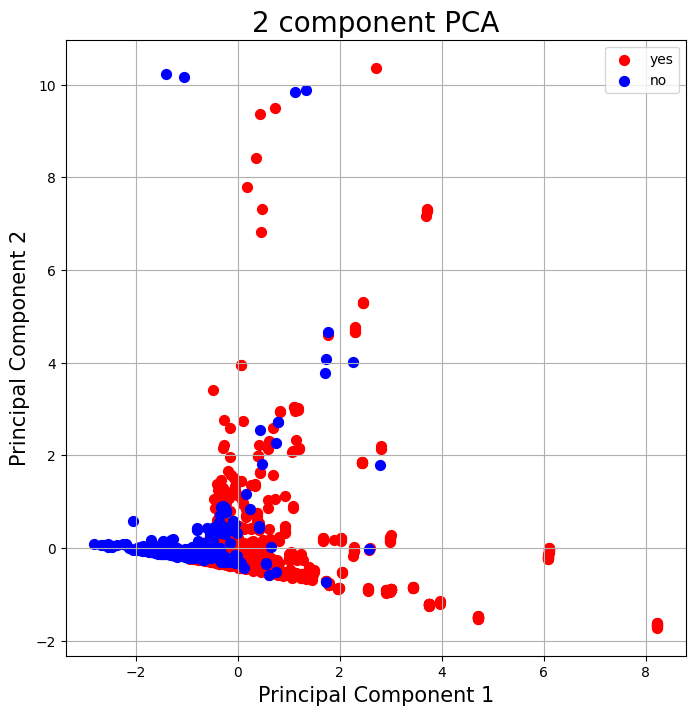

In [10]:
from matplotlib import pyplot as plt


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['yes', 'no']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['worth_reading'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [11]:
pca.explained_variance_ratio_

array([0.42468405, 0.23804705])

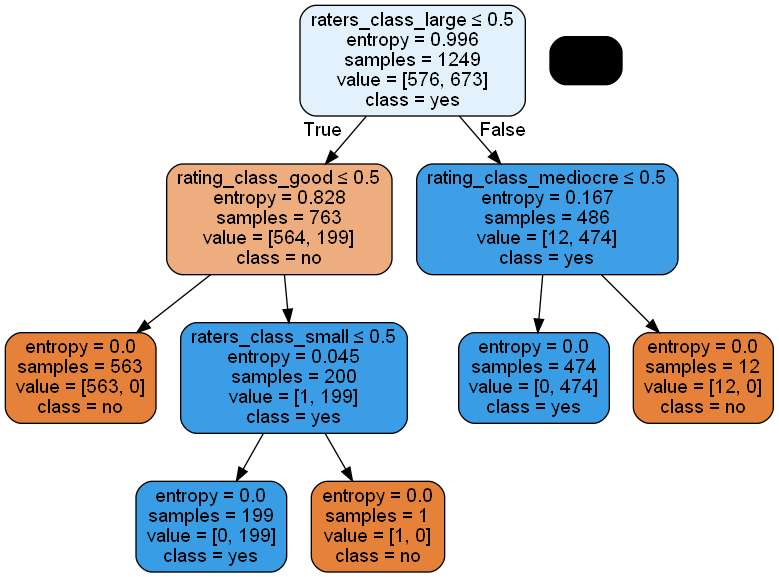

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
                     feature_names=X.columns,  
                     class_names=["no", "yes"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('read_horror.png')
Image(graph.create_png())

In [ ]:
#Trying to predict new data
# good rating class, small rater class
X_test = pd.DataFrame({ "rating_class_good" : [1],
                        "rating_class_above average" : [0],
                        "rating_class_mediocre" : [0], 
                        "raters_class_large" : [0],
                        "raters_class_medium" : [0],
                        "raters_class_small" : [1],
                    })

y_predict= model.predict(X_test)
print("Test 1: ", y_predict)

# good rating class, small rater class
X_test = pd.DataFrame({ "rating_class_good" : [0],
                        "rating_class_above average" : [1],
                        "rating_class_mediocre" : [0], 
                        "raters_class_large" : [0],
                        "raters_class_medium" : [1],
                        "raters_class_small" : [1],
                    })

y_predict= model.predict(X_test)
print("Test 2: ", y_predict)

# good rating class, small rater class
X_test = pd.DataFrame({ "rating_class_good" : [0],
                        "rating_class_above average" : [1],
                        "rating_class_mediocre" : [0], 
                        "raters_class_large" : [1],
                        "raters_class_medium" : [0],
                        "raters_class_small" : [0],
                    })

y_predict= model.predict(X_test)
print("Test 3: ", y_predict)

Test 1:  ['no']
Test 2:  ['no']
Test 3:  ['yes']
